## Simple Linear Regression

Simple linear regression is a concept that makes a lot of sense intuitively but can be hard to explain concretely (like 'minimising the sum of squares'). It's not until I came across ["Introduction to Statistical Learning"](https://www.amazon.com/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370/) that I realised how wooly my understanding was.

### The dataset

For this exercise we'll be looking the relationship between head size and brain weight, leveraging the results from a [1905 study](http://www.stat.ufl.edu/~winner/data/brainhead.txt). The data is in a fixed width format, perfect for pandas' `read_fwf`.

In [13]:
import requests, pandas, io
url='http://www.stat.ufl.edu/~winner/data/brainhead.dat'
data=requests.get(url)
col_names=('gender', 'age_range', 'head_size', 'brain_weight')
col_widths=[(8,8),(16,16),(21-24),(29-32)]
df=pandas.read_fwf(io.StringIO(data.text), names=col_names, colspec=col_widths)
df.head()

,gender,age_range,head_size,brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Now that we have our data in a DataFrame, let's plot `brain_weight` against `head_size`.

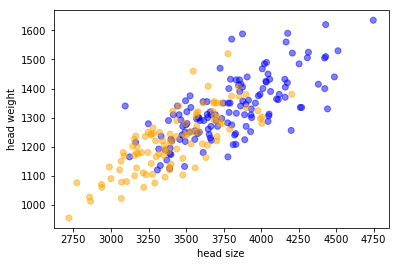

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
# here males will be plotted as blue and femals as orange
df['colour'] = df.apply(lambda r: 'blue' if r['gender'] == 1 else 'orange', axis=1)
plt.scatter(df.head_size, df.brain_weight, c=df.colour, alpha=0.5)
plt.xlabel('head size')
plt.ylabel('brain weight')
#TODO add legend to plot!

### Regression

At first glance it does look like there is some sort of linear relationship between those two variables. What we'll try and do is to plot the line that best illustrates the relationship based on our sample data. If you remember (or don't), a line has the form `y = mx + b` where `m` is the slope and `b` the `y` intercept. In regression form that is $Y \approx \beta_0 + \beta_1 X$ with $\beta_0$ and $\beta_1$ being the intercept and slope respectively - which is to say we are looking to model `brain_weight` onto `head_size`.

#### Coefficients

In order for our line to be a good fit, we need to define what a good fit is. For us that means finding a line that is as close to all the points as possible. Given they don't all fit on a single line it means some points will be a better fit than others.

Let's plot a naive regression line that fits the smallest and maximum head size sample points.

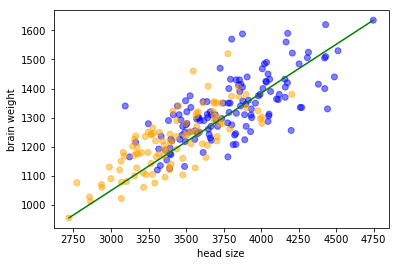

In [41]:
o=df.ix[df['head_size'].idxmin()]
x1,y1=o.head_size,o.brain_weight
o=df.ix[df['head_size'].idxmax()]
x2,y2=o.head_size,o.brain_weight

plt.scatter(df.head_size, df.brain_weight, c=df.colour, alpha=0.5)
# add the naive regression line
plt.plot([x1,x2],[y1,y2], c='green')
plt.xlabel('head size')
plt.ylabel('brain weight')

In [42]:
# calculate the slope
m=(y2-y1)/(x2-x1)
# solve for the intercept
b=y1-m*x2
m, b

(0.33547113961519487, -637.48149975333013)